## Data Analysis Lab I

For this lab, you will continue work on your 4th TLAB. The dataset for this lab is in the `../data/shopping.csv` file. 

The goals for this process include:

* Generate new groups & bins to explore relationships
* Generate pivot tables for further analysis 
* Answer a few business-related questions

After you've completed this process, answer the questions underneath `Data Analysis Lab II` in your own words.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# TODO: load `../data/shopping.csv` as a pandas dataframe

df = pd.read_csv("shopping.csv")

df.head(10)

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,3475,NaN,Male,Jacket,30.904467,Maine,M,Burnt orange,Fall,4.0,Standard,No,0,Credit Card,NaN
1,3698,21.0,Female,Backpack,31.588259,NaN,L,Turquoise,Winter,2.0,Express,No,1,Credit Card,Monthly
2,2756,31.0,Male,Leggings,24.231704,Nevada,M,Terra cotta,Winter,4.0,Standard,No,0,Credit Card,NaN
3,3340,NaN,Male,Pajamas,33.918834,Nebraska,M,Black,Winter,NaN,Standard,No,2,Credit Card,Bi-Weekly
4,3391,38.0,Male,Sunglasses,36.545487,Oregon,S,Aubergine,Summer,NaN,Standard,No,0,Credit Card,NaN
5,2599,26.0,Male,Leggings,23.595139,Nevada,XL,Brown,Winter,NaN,Standard,No,3,Credit Card,Quarterly
6,2591,43.0,Male,Dress,34.079015,California,M,Terra cotta,Fall,5.0,Standard,No,0,Credit Card,NaN
7,3650,29.0,Male,Shorts,23.796439,Minnesota,M,Lavender,Summer,2.0,Express,No,0,Credit Card,NaN
8,3353,25.0,Female,Jacket,31.595005,Washington,M,Mauve,Fall,4.0,Standard,No,4,Credit Card,Quarterly
9,2477,39.0,Female,Shorts,32.374104,Colorado,M,Fuchsia,Summer,NaN,Standard,No,3,Credit Card,Bi-Weekly


In [44]:
df.shape

(3900, 18)

In [42]:
df.isna().sum()

Customer ID                  0
Age                        390
Gender                       0
Item Purchased               0
Purchase Amount (USD)        0
Location                   390
Size                         0
Color                        0
Season                       0
Review Rating             2469
Shipping Type                0
Promo Code Used              0
Previous Purchases           0
Payment Method               0
Frequency of Purchases    2340
cut                          0
qcut                         0
purchase group               0
dtype: int64

In [46]:
notnull = df[df["Review Rating"].notna()]

notnull

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cut,qcut,purchase group
0,3475,NaN,Male,Jacket,30.904467,Maine,M,Burnt orange,Fall,4.0,Standard,No,0,Credit Card,NaN,"(28.845, 34.663]","(30.665, 33.35]",Ellipsis
1,3698,21.0,Female,Backpack,31.588259,NaN,L,Turquoise,Winter,2.0,Express,No,1,Credit Card,Monthly,"(28.845, 34.663]","(30.665, 33.35]",Ellipsis
2,2756,31.0,Male,Leggings,24.231704,Nevada,M,Terra cotta,Winter,4.0,Standard,No,0,Credit Card,NaN,"(23.028, 28.845]","(11.392000000000001, 24.426]",Ellipsis
6,2591,43.0,Male,Dress,34.079015,California,M,Terra cotta,Fall,5.0,Standard,No,0,Credit Card,NaN,"(28.845, 34.663]","(33.35, 36.953]",Ellipsis
7,3650,29.0,Male,Shorts,23.796439,Minnesota,M,Lavender,Summer,2.0,Express,No,0,Credit Card,NaN,"(23.028, 28.845]","(11.392000000000001, 24.426]",Ellipsis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,308,34.0,Male,Backpack,55.074249,NaN,M,Terra cotta,Fall,4.0,2-Day Shipping,Yes,3,Venmo,NaN,"(52.115, 57.932]","(54.522, 69.567]",Ellipsis
3891,380,31.0,Male,Dress,54.477494,Montana,S,Pale peach,Summer,4.0,2-Day Shipping,Yes,3,Venmo,NaN,"(52.115, 57.932]","(50.425, 54.522]",Ellipsis
3892,334,36.0,Male,Socks,54.580001,NaN,M,Black,Fall,4.0,2-Day Shipping,Yes,3,Venmo,NaN,"(52.115, 57.932]","(54.522, 69.567]",Ellipsis
3896,1472,37.0,Male,Pajamas,44.600556,Alaska,S,Aubergine,Winter,4.0,2-Day Shipping,Yes,20,Venmo,NaN,"(40.48, 46.297]","(42.527, 46.867]",Ellipsis


<Axes: ylabel='Frequency'>

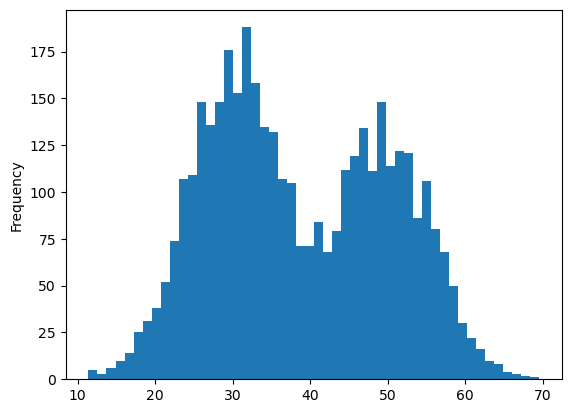

In [4]:
df["Purchase Amount (USD)"].plot.hist(bins=50)

bimodal distribution 

In [5]:
df["cut"] = pd.cut(df["Purchase Amount (USD)"], bins=10)
df["qcut"] = pd.qcut(df["Purchase Amount (USD)"], q=10)

<Axes: xlabel='cut'>

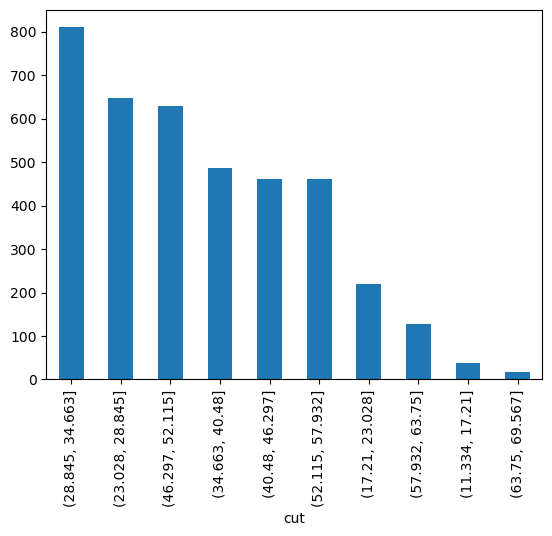

In [6]:
df["cut"].value_counts().plot.bar()

equal ranges 

cut: when to see true distrubution/nature of our data

<Axes: xlabel='qcut'>

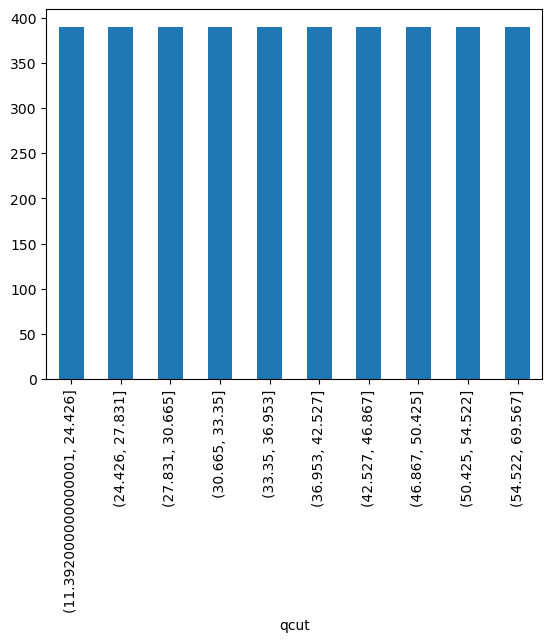

In [7]:
df["qcut"].value_counts().plot.bar()

equal samples

qcut: when we want equal represation of our samples

# Breakdown code
pd.pivot_table(df, values="", index="", columns="", aggfunc="")
values are continuous or quantitative
index and columns are discrete or categorical 
aggfunc automatically set to mean but can change to median, mode, sum, etc.

In [8]:
pd.pivot_table(df, values="Purchase Amount (USD)", index="Promo Code Used", columns="Season")

Season,Fall,Spring,Summer,Winter
Promo Code Used,,,,
No,30.094977,30.161013,30.443478,30.041981
Yes,50.147747,50.183152,50.161897,49.748478


More likely to spend more money if a promo code is used no matter the season. There's a $20 increase 

In [9]:
# TODO: Observe the head just to reorient ourselves with the dataframe. Take note of the columns and their types

df.head()

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cut,qcut
0,3475,NaN,Male,Jacket,30.904467,Maine,M,Burnt orange,Fall,4.0,Standard,No,0,Credit Card,NaN,"(28.845, 34.663]","(30.665, 33.35]"
1,3698,21.0,Female,Backpack,31.588259,NaN,L,Turquoise,Winter,2.0,Express,No,1,Credit Card,Monthly,"(28.845, 34.663]","(30.665, 33.35]"
2,2756,31.0,Male,Leggings,24.231704,Nevada,M,Terra cotta,Winter,4.0,Standard,No,0,Credit Card,NaN,"(23.028, 28.845]","(11.392000000000001, 24.426]"
3,3340,NaN,Male,Pajamas,33.918834,Nebraska,M,Black,Winter,NaN,Standard,No,2,Credit Card,Bi-Weekly,"(28.845, 34.663]","(33.35, 36.953]"
4,3391,38.0,Male,Sunglasses,36.545487,Oregon,S,Aubergine,Summer,NaN,Standard,No,0,Credit Card,NaN,"(34.663, 40.48]","(33.35, 36.953]"


## Groups

In [34]:
# TODO: Group your dataframe according to the "Payment Method" column. Save this grouped dataframe into a new variable
# called 'g_pay' 
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

g_pay = df.groupby("Payment Method")

g_pay

In [39]:
# To get sample size of data

g_pay["Purchase Amount (USD)"].count()

Payment Method
Bank Transfer      11
Cash               10
Credit Card      1400
Debit Card       1300
PayPal            600
Venmo             579
Name: Purchase Amount (USD), dtype: int64

In [37]:
# TODO: Using the "agg" function calculate the mean and median of the "Purchase Amount (USD)" column in the `g_pay` object

g_pay["Purchase Amount (USD)"].agg(["mean", "median"])


,mean,median
Payment Method,,
Bank Transfer,42.724584,36.591483
Cash,37.174985,34.569802
Credit Card,38.607690,36.940467
Debit Card,38.826152,37.005280
PayPal,38.748823,36.708289
Venmo,38.595344,37.102529


In [12]:
# TODO: Using the "agg" function calculate the mean and median of the "Age" column in the `g_pay` object

g_pay["Age"].agg(["mean", "median"])

,mean,median
Payment Method,,
Bank Transfer,65.090909,64.0
Cash,65.300000,64.0
Credit Card,33.774270,33.0
Debit Card,33.595506,32.0
PayPal,35.355433,34.0
Venmo,34.505747,33.0


In [13]:
# TODO: Using the "agg" function calculate the mean and median of the "Review Rating" column in the `g_pay` object


g_pay["Review Rating"].agg(["mean", "median"])

,mean,median
Payment Method,,
Bank Transfer,4.000000,4.0
Cash,3.333333,4.0
Credit Card,3.874763,4.0
Debit Card,3.960334,4.0
PayPal,3.886792,4.0
Venmo,3.879808,4.0


In [14]:
# TODO: Group your dataframe according to the "Season" column. Save this grouped dataframe into a new variable
# called 'g_season' 

g_season = df.groupby("Season")

In [15]:
# TODO: Using the "agg" function calculate the mean and median of the "Purchase Amount (USD)" column in the `g_season` object

...

Ellipsis

In [16]:
# TODO: Using the "agg" function calculate the mean and median of the "Age" column in the `g_season` object

...

Ellipsis

In [17]:
# TODO: Using the "agg" function calculate the mean and median of the "Review Rating" column in the `g_season` object

...

Ellipsis

## Pivot Tables

In [41]:
# TODO: Create a pivot table where "Payment Method" is your column, "Shipping Type" is your index, and "Age" is your value
# use the "mean" function as the "aggfunc" parameter.
# Save this pivot table to a new variable named `tab_pay`
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#

tab_pay = pd.pivot_table(df, values="Customer ID", index="Shipping Type", columns="Payment Method", aggfunc="count")

tab_pay

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Shipping Type,,,,,,
2-Day Shipping,4.0,2.0,434.0,403.0,169.0,161.0
Express,NaN,NaN,102.0,85.0,41.0,51.0
Next Day Air,NaN,1.0,93.0,92.0,50.0,48.0
Standard,7.0,7.0,770.0,719.0,340.0,319.0
Store Pickup,NaN,NaN,1.0,1.0,NaN,NaN


In [19]:
# TODO: output this table for display. Notice the difference in average ages.

tab_pay

Ellipsis

In [20]:
# TODO: Create a pivot table where you analyze the count of purchases for each combination of "Color" and "Season"
# use the "count" function as the "aggfunc" parameter.
# Save this pivot table to a new variable named `tab_season`
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#

tab_season = ...

In [21]:
# TODO: Output this table for observation. Notice how counts of colors change throughout the season

tab_season

Ellipsis

In [22]:
# TODO: Using the "idmax" method, get the index with the maximum value for each Season column on the pivot table `tab_season`
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

...

Ellipsis

## Bins 

In [23]:
# TODO: Create a new column called "purchase group" in your original dataframe which equally seperates your dataframe into 
# two groups of shoppers based on their "Purchase Amount (USD)" column using the "pd.qcut" method. 
# Ensure that you are only creating 2 "bins" and label these respective bins as ["Low", "High"]
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

df["purchase group"] = ...

df["purchase group"]

0       Ellipsis
1       Ellipsis
2       Ellipsis
3       Ellipsis
4       Ellipsis
          ...   
3895    Ellipsis
3896    Ellipsis
3897    Ellipsis
3898    Ellipsis
3899    Ellipsis
Name: purchase group, Length: 3900, dtype: object

In [24]:
# TODO: Group your dataframe according to this new "purchase group" column. Save this grouped dataframe into a new variable
# called 'g_purchase' 

...

Ellipsis

In [25]:
# TODO: Using the "agg" function calculate the mean and median of the "Review Rating" column in the `g_purchase` object

...

Ellipsis

In [26]:
# TODO: Using the "agg" function calculate the mean and median of the "Previous Purchases" column in the `g_purchase` object

...

Ellipsis

## Hypothesis Testing 

Your manager has a hunch that people who have paid by credit card tend to spend more than people who have purchased by debit card. Let's test the statistical assumptions of this hypothesis.

What is the null hypothesis of this experiment? **Rememeber**: we are discussing the differences between average amounts spent between two groups.

Answer here

What is the alternative hypothesis of this experiment? **Rememeber**: we are discussing the differences between average amounts spent between two groups.

Answer here

In [27]:
# TODO: Create two new dataframes for only credit-card purchases and debit-card purchases, and save each respective dataframe into variables named `credit` and `debit` respectively. 
# Use boolean indexing to accomplish this. Recall that these values lie in the "Payment Method" column

credit = ...
debit = ...

In [28]:
# TODO: Calculate the p-value of the t-score between the "Purchase Amount (USD)" column of both these dataframes
# Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

from scipy import stats 

stats.ttest_ind(credit["Purchase Amount (USD)"], debit["Purchase Amount (USD)"])

TypeError: 'ellipsis' object is not subscriptable

## Data Analysis Lab II

In the next section, answer a few questions regarding your dataset using the output you've generated.

## Q1

Based on the p-value that we've calculated, what can we state about the null hypothesis referring to the difference of average dollars spent between credit card and debit card holders.

Answer here

## Q2

What is the average age of a user who pays with cash? What is the average age of someone who pays with credit card? Is there a difference between these two users?

Answer here

## Q3

What is the average age of a user who buys clothes in the spring? What is the average age of a user who buys clothes in the winter Is there a difference between these two users?

Answer here

## Q4

What is the most popular season for the color "Lemon yellow"?

Answer here

## Q5

What is the average review rating of a "low" purchase group user and the "high" purchase group?

Answer here